In [1]:
import pandas as pd

In [2]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the data
Data = spark.read.format("csv").option("header", "true").load("cleaningdata.csv")

# Create a temporary view
Data.createOrReplaceTempView("carprices")

# Show the data
Data.show()


+----+---------+-------------------+--------------------+-----------+------------+-----------------+-----+---------+--------+------+--------+--------------------+-------+------------+--------------------+
|year|     make|              model|                trim|       body|transmission|              vin|state|condition|odometer| color|interior|              seller|    mmr|sellingprice|            saledate|
+----+---------+-------------------+--------------------+-----------+------------+-----------------+-----+---------+--------+------+--------+--------------------+-------+------------+--------------------+
|2015|      Kia|            Sorento|                  LX|        SUV|   automatic|5xyktca69fg566472|   ca|      5.0| 16639.0| white|   black|kia motors americ...|20500.0|     21500.0|Tue Dec 16 2014 1...|
|2015|      Kia|            Sorento|                  LX|        SUV|   automatic|5xyktca69fg561319|   ca|      5.0|  9393.0| white|   beige|kia motors americ...|20800.0|     21500

In [3]:
# 1. Identify car models with significant variations in monthly sales revenue with limit 15.
result_df = spark.sql('''
    SELECT 
        model,
        AVG(sellingprice - mmr) AS average_price_variation
    FROM 
        carprices  
    WHERE 
        sellingprice IS NOT NULL 
        AND mmr IS NOT NULL 
        AND (sellingprice + mmr) != 0
    GROUP BY 
        model 
    ORDER BY 
        average_price_variation DESC
    LIMIT 15
''')

# Show the result of the SQL query
result_df.show()


+--------------+-----------------------+
|         model|average_price_variation|
+--------------+-----------------------+
|    interstate|                41500.0|
|         tahoe|                10000.0|
|        Rapide|                 8250.0|
|   CTS-V Wagon|                 8200.0|
|         siera|                 4525.0|
|       eurovan|                 3500.0|
|       equinox|                 3400.0|
|           DB9|     2883.3333333333335|
|      Marauder|                2843.75|
|ActiveHybrid 5|                 2825.0|
|ActiveHybrid 7|      2723.076923076923|
|           H3T|     2466.6666666666665|
|            H1|                 2350.0|
|      escalade|                 2300.0|
|        Savana|      2265.909090909091|
+--------------+-----------------------+



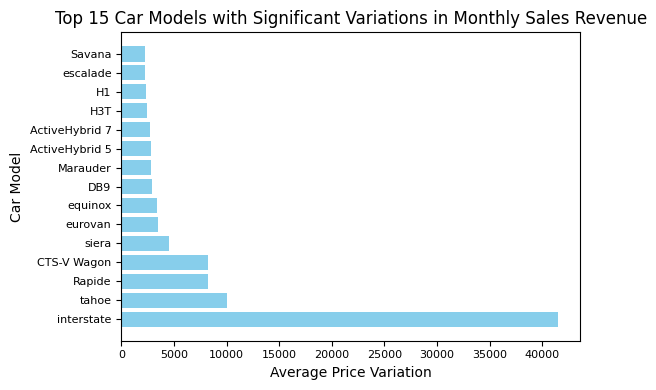

In [4]:
# Extracting data from DataFrame columns
import matplotlib.pyplot as plt

models = [row['model'] for row in result_df.collect()]
price_variations = [row['average_price_variation'] for row in result_df.collect()]

# Plotting with improved readability
plt.figure(figsize=(6, 4))  # Adjust the figure size
plt.barh(models, price_variations, color='skyblue')
plt.xlabel('Average Price Variation')
plt.ylabel('Car Model')
plt.title('Top 15 Car Models with Significant Variations in Monthly Sales Revenue')
plt.xticks(fontsize=8)  # Adjust the font size of x-axis ticks
plt.yticks(fontsize=8)  # Adjust the font size of y-axis ticks
plt.tight_layout()
plt.show()

In [5]:
# 2 The efficiency of each car in generating revenue based on its odometer reading.
result_df = spark.sql('''
     SELECT
        make,
        model,
        trim,
        sellingprice - mmr AS revenue,
        CASE WHEN odometer = 0 THEN NULL ELSE sellingprice / odometer END AS revenue_per_mile
    FROM
        carprices
    WHERE
        sellingprice IS NOT NULL
        AND mmr IS NOT NULL
        AND odometer IS NOT NULL
    ORDER BY
        revenue_per_mile DESC
            LIMIT 10

''')

# Show the result of the SQL query
result_df.show()



+-------------+----------------+-------------+--------+----------------+
|         make|           model|         trim| revenue|revenue_per_mile|
+-------------+----------------+-------------+--------+----------------+
|    Chevrolet|        Corvette|         Base|  5200.0|         37000.0|
|     Chrysler|Town and Country|    Touring-L|  8450.0|         36750.0|
|          BMW|              M5|         Base|-41000.0|         35000.0|
|        Mazda|         Tribute|            s| 26500.0|         35000.0|
|       Toyota|          Sienna|L 7-Passenger| 11000.0|         34500.0|
|          GMC|   Sierra 2500HD|          SLE| -9400.0|         30500.0|
|         Ford|            Edge|          SEL|  7200.0|         30000.0|
|Mercedes-Benz|        GL-Class| GL450 4MATIC|-22300.0|         29200.0|
|     Infiniti|         G Sedan|  G37 Journey| -1200.0|         23800.0|
|Mercedes-Benz|        GL-Class|        GL550|  1600.0|         23500.0|
+-------------+----------------+-------------+-----

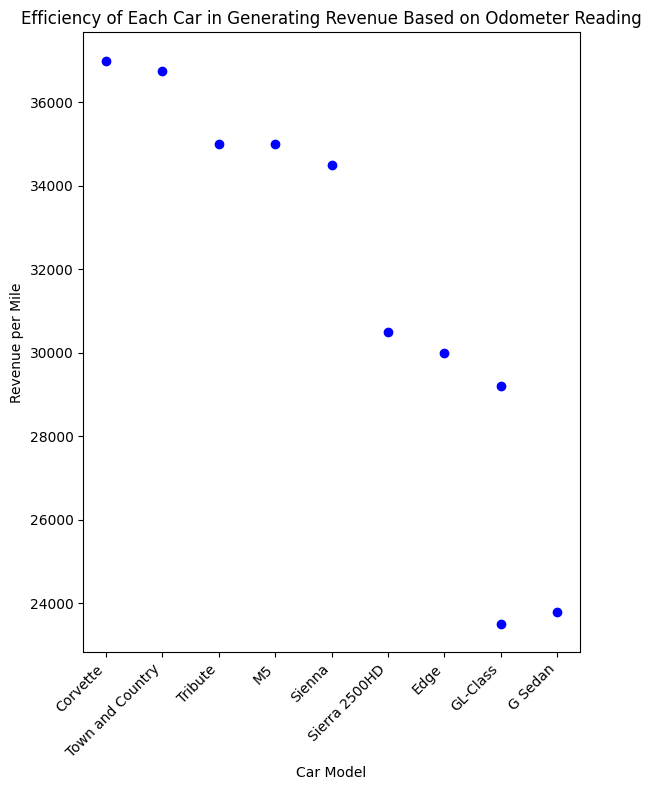

In [6]:
import matplotlib.pyplot as plt

# Extracting data from DataFrame columns
models = [row['model'] for row in result_df.collect()]
revenue_per_mile = [row['revenue_per_mile'] for row in result_df.collect()]

# Plotting as a scatter plot
plt.figure(figsize=(6, 8))
plt.scatter(models, revenue_per_mile, color='blue')
plt.xlabel('Car Model')
plt.ylabel('Revenue per Mile')
plt.title('Efficiency of Each Car in Generating Revenue Based on Odometer Reading')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
#3. Identify car models with high engagement relative to their sales.
result_df = spark.sql('''
     SELECT
        make,
        model,
        trim,
        CASE WHEN odometer = 0 THEN NULL ELSE sellingprice / odometer END AS revenue_per_mile
    FROM
        carprices
    WHERE
        sellingprice IS NOT NULL
        AND mmr IS NOT NULL
        AND odometer IS NOT NULL
    ORDER BY
        revenue_per_mile DESC
        limit 15
''')

# Show the result of the SQL query
result_df.show()


+-------------+----------------+-------------+----------------+
|         make|           model|         trim|revenue_per_mile|
+-------------+----------------+-------------+----------------+
|    Chevrolet|        Corvette|         Base|         37000.0|
|     Chrysler|Town and Country|    Touring-L|         36750.0|
|        Mazda|         Tribute|            s|         35000.0|
|          BMW|              M5|         Base|         35000.0|
|       Toyota|          Sienna|L 7-Passenger|         34500.0|
|          GMC|   Sierra 2500HD|          SLE|         30500.0|
|         Ford|            Edge|          SEL|         30000.0|
|Mercedes-Benz|        GL-Class| GL450 4MATIC|         29200.0|
|     Infiniti|         G Sedan|  G37 Journey|         23800.0|
|Mercedes-Benz|        GL-Class|        GL550|         23500.0|
|       Nissan|          Altima|        2.5 S|         23200.0|
|          GMC|        Yukon XL|     SLT 1500|         23000.0|
|         Ford|            Edge|        

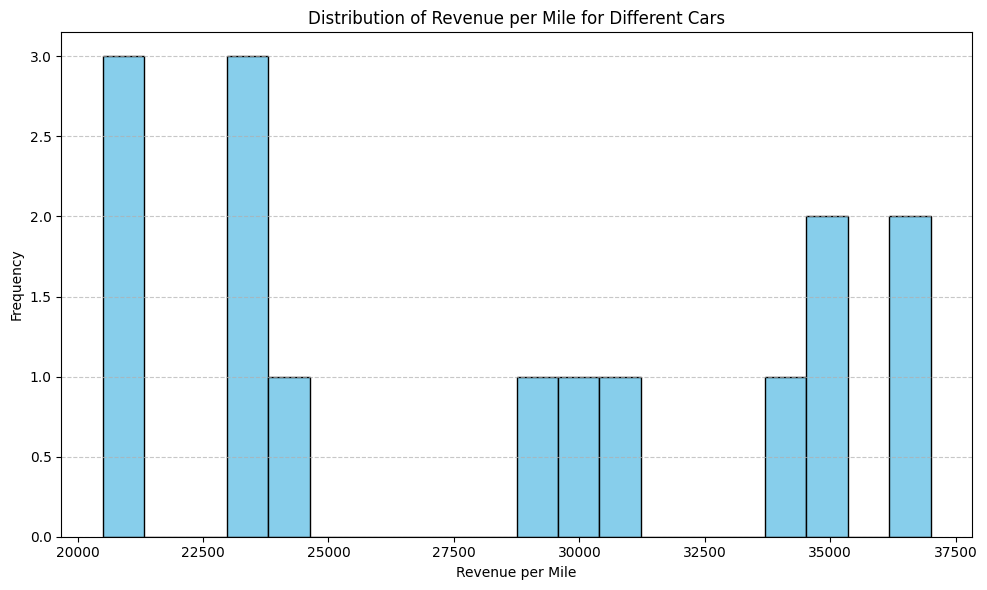

In [7]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Drop rows with NaN values in 'revenue_per_mile'
result_pd = result_pd.dropna(subset=['revenue_per_mile'])

# Plotting as a bar chart
plt.figure(figsize=(10, 6))
plt.hist(result_pd['revenue_per_mile'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Revenue per Mile')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue per Mile for Different Cars')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [44]:
# 4. The performance of different car categories based on their total sales in a year
result_df = spark.sql('''
     SELECT
    year,
    model,
    SUM(sellingprice) AS total_sales
FROM
    carprices
GROUP BY
    year,
    model
ORDER BY
    year DESC, total_sales DESC
    
    limit =10;

''')

# Show the result of the SQL query
result_df.show()


+----+----------------+-----------+
|year|           model|total_sales|
+----+----------------+-----------+
|2015|         Sorento| 1.903775E7|
|2015|           Tahoe| 1.286915E7|
|2015|          Altima|  9768750.0|
|2015|        Suburban|  9752750.0|
|2015|        Explorer|  8800800.0|
|2015|             200|  6959350.0|
|2015|Silverado 2500HD|  6066750.0|
|2015|        3 Series|  5720250.0|
|2015|F-250 Super Duty|  5473350.0|
|2015|            CX-5|  5045250.0|
+----+----------------+-----------+



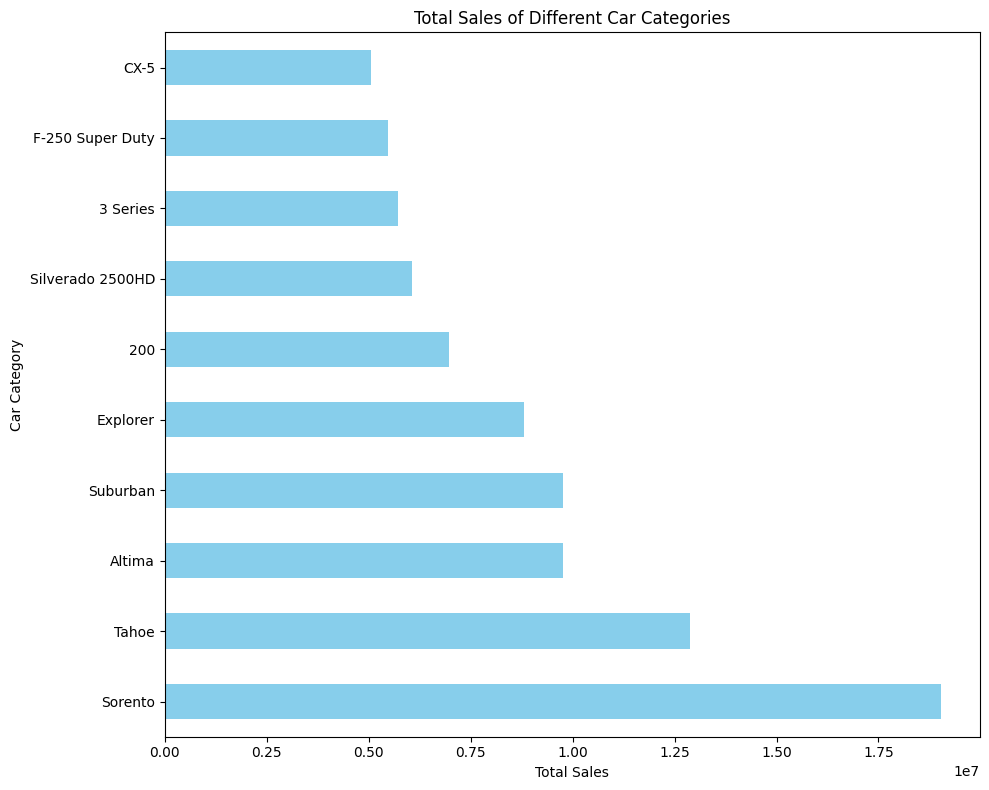

In [48]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Group the data by car category and calculate the total sales
total_sales_per_category = result_pd.groupby('model')['total_sales'].sum()

# Sorting the categories by total sales
total_sales_per_category = total_sales_per_category.sort_values(ascending=False)

# Plotting as a horizontal bar chart
plt.figure(figsize=(10, 8))
total_sales_per_category.plot(kind='barh', color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Car Category')
plt.title('Total Sales of Different Car Categories')
plt.tight_layout()
plt.show()


In [22]:
# 5 Calculate the average number of sales per car for the top three car manufacturers.
result_df = spark.sql('''  
SELECT make AS manufacturer,
       SUM(sellingprice) / COUNT(*) AS average_sales_per_car
FROM carprices
GROUP BY make
ORDER BY SUM(sellingprice) DESC
LIMIT 3
''')

# Show the result of the SQL query
result_df.show()


+------------+---------------------+
|manufacturer|average_sales_per_car|
+------------+---------------------+
|        Ford|   13987.392903567474|
|   Chevrolet|   11977.397528116018|
|      Nissan|    11739.01596040485|
+------------+---------------------+



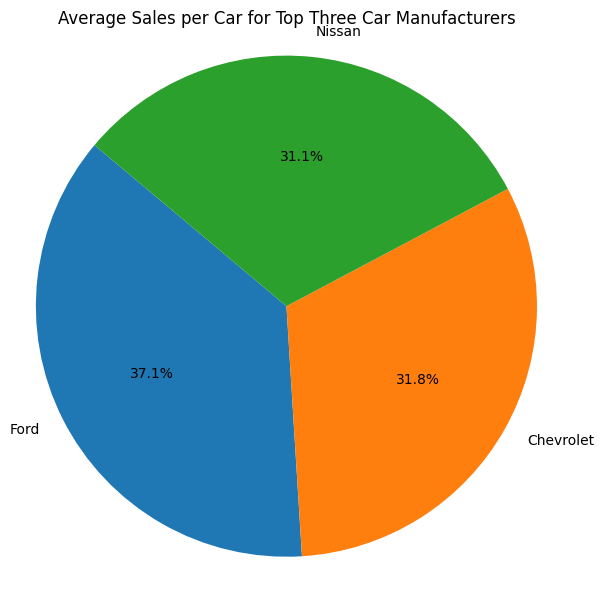

In [26]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Sorting the data by average sales per car for consistency in plotting
result_pd.sort_values(by='average_sales_per_car', ascending=False, inplace=True)

# Selecting the top three manufacturers
top_three_manufacturers = result_pd.head(3)

# Plotting as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_three_manufacturers['average_sales_per_car'], labels=top_three_manufacturers['manufacturer'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Average Sales per Car for Top Three Car Manufacturers')
plt.tight_layout()
plt.show()


In [65]:
# 6 Identify the top-selling car models with the highest monthly earnings per car.
result_df = spark.sql('''  
SELECT 
    year, make, model, 
    SUM(sellingprice) AS total_earnings,
    (SUM(sellingprice) / COUNT(*)) AS monthly_earnings_per_car
FROM carprices
GROUP BY year, make, model
ORDER BY monthly_earnings_per_car DESC
LIMIT 5
''')

# Show the result of the SQL query
result_df.show()


+----+-------------+----------+--------------+------------------------+
|year|         make|     model|total_earnings|monthly_earnings_per_car|
+----+-------------+----------+--------------+------------------------+
|2011|      Ferrari|458 Italia|      183000.0|                183000.0|
|2013|  Rolls-Royce|     Ghost|      171500.0|                171500.0|
|2012|  Rolls-Royce|     Ghost|      505500.0|                168500.0|
|2013|Mercedes-Benz|SLS AMG GT|      156500.0|                156500.0|
|2014|          BMW|        i8|     1388000.0|      154222.22222222222|
+----+-------------+----------+--------------+------------------------+



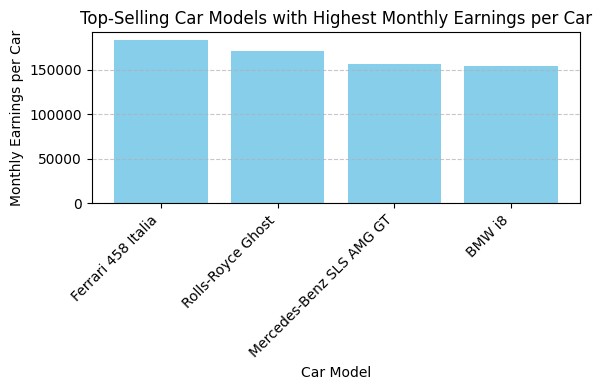

In [66]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Plotting as a vertical bar chart
plt.figure(figsize=(6, 4))
plt.bar(result_pd['make'] + ' ' + result_pd['model'], result_pd['monthly_earnings_per_car'], color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Monthly Earnings per Car')
plt.title('Top-Selling Car Models with Highest Monthly Earnings per Car')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [73]:
# 7. Identify dealerships that have experienced significant growth in sales over the past year
result_df = spark.sql('''  
SELECT 
    seller AS dealership,
    make,
    COUNT(*) AS total_sales,
    YEAR(saledate) AS sales_year
FROM carprices
WHERE YEAR(saledate) = (SELECT MAX(YEAR(saledate)) FROM carprices)
   OR YEAR(saledate) = (SELECT MAX(YEAR(saledate)) - 1 FROM carprices)
GROUP BY seller, make, YEAR(saledate)
ORDER BY dealership, sales_year DESC;
''')

# Show the result of the SQL query
result_df.show()


+----------+----------+-----------+----------+
|dealership|      make|total_sales|sales_year|
+----------+----------+-----------+----------+
|      gray|Volkswagen|          1|     16500|
+----------+----------+-----------+----------+



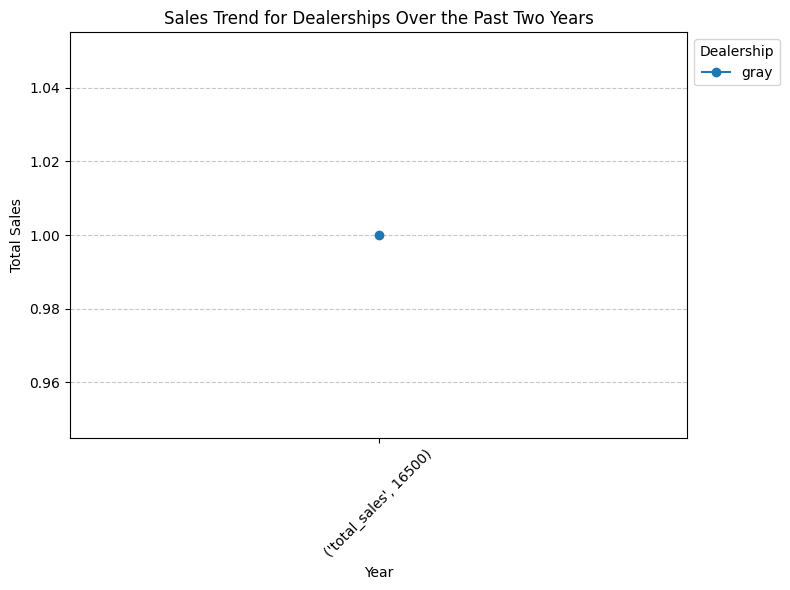

In [77]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Filter out dealerships with missing data for either year (to focus on those with sales in both years)
filtered_result = result_pd.groupby(['dealership', 'sales_year']).agg({'total_sales': 'sum'}).unstack()

# Drop any missing values
filtered_result = filtered_result.dropna()

# Convert sales years to string to avoid data type issues
filtered_result.columns = filtered_result.columns.map(lambda x: str(x))

# Plotting as a line chart
plt.figure(figsize=(8, 6))

for dealership in filtered_result.index:
    plt.plot(filtered_result.columns, filtered_result.loc[dealership], marker='o', label=dealership)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend for Dealerships Over the Past Two Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dealership', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [11]:
# 8. Identify car dealerships with the highest ratio of sales to inventory.
result_df = spark.sql('''  
SELECT 
    seller AS dealership,
    COUNT(*) AS total_inventory,
    COUNT(sellingprice) AS total_sales,
    ROUND(COUNT(sellingprice) * 1.0 / COUNT(*), 2) AS sales_to_inventory_ratio
FROM 
    carprices
GROUP BY 
    seller
ORDER BY 
    sales_to_inventory_ratio DESC

    limit 15
''')

# Show the result of the SQL query
result_df.show()


+--------------------+---------------+-----------+------------------------+
|          dealership|total_inventory|total_sales|sales_to_inventory_ratio|
+--------------------+---------------+-----------+------------------------+
|balboa thrift & l...|             61|         61|                    1.00|
|california auto w...|            129|        129|                    1.00|
|repo remarketing/...|              6|          6|                    1.00|
|jaguar land rover...|             20|         20|                    1.00|
|   low gos used cars|             24|         24|                    1.00|
|montclair auto sl...|             59|         59|                    1.00|
|     pa distributors|             18|         18|                    1.00|
|autolenders liqui...|            388|        388|                    1.00|
|   bailey auto plaza|              6|          6|                    1.00|
|southern auto fin...|            157|        157|                    1.00|
|      rock 

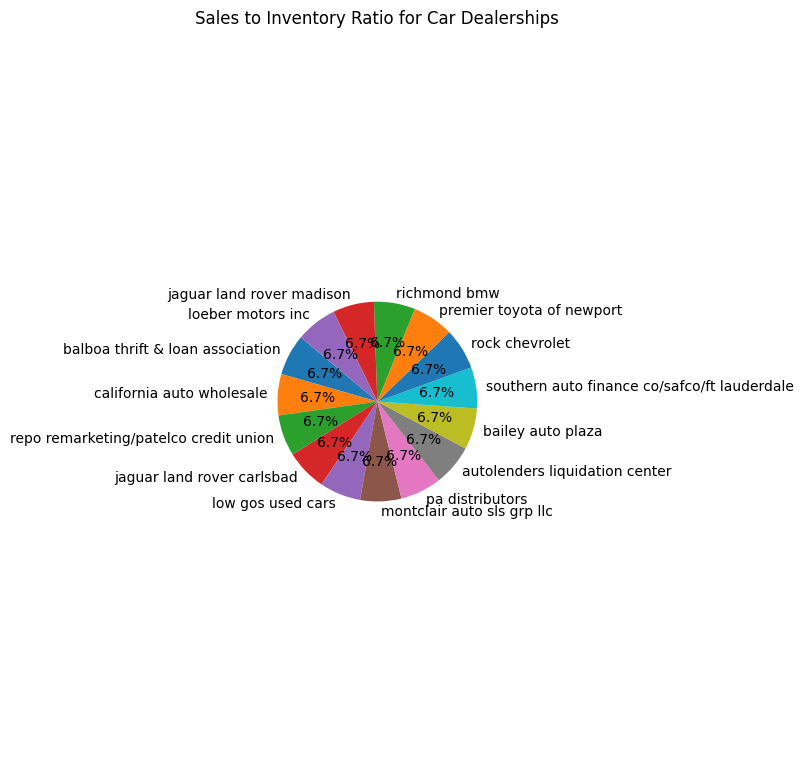

In [12]:
import matplotlib.pyplot as plt

# Convert the result DataFrame to Pandas for easy plotting
result_pd = result_df.toPandas()

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(result_pd['sales_to_inventory_ratio'], labels=result_pd['dealership'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sales to Inventory Ratio for Car Dealerships')
plt.tight_layout()
plt.show()
